In [1]:
from keras.models import save_model, load_model
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten,Dropout
from keras.layers import Conv2D,BatchNormalization,MaxPooling2D,Reshape
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import os

save = False
data_folder = './EEG-Data'
os.chdir(data_folder)
print(os.getcwd())



2024-03-12 08:44:31.659839: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-12 08:44:31.687121: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-12 08:44:31.687150: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-12 08:44:31.687526: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-12 08:44:31.691605: I tensorflow/core/platform/cpu_feature_guar

/home/big/Kevin/Workspace/Homework/ecec147/project/Deep-Learning-EEG-BCI-Signal-Processing/EEG-Data


(2115, 22, 1000)


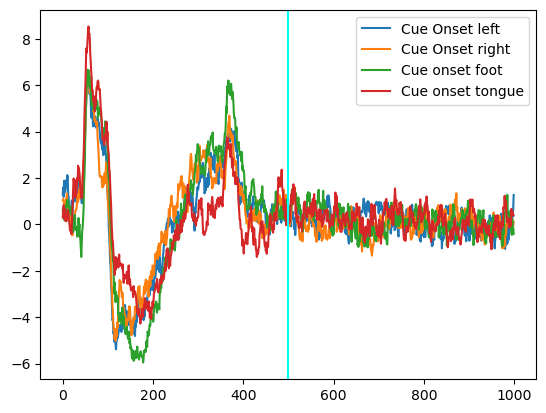

In [2]:

## Loading and visualizing the data

## Loading the dataset

X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")
person_train_valid = np.load("person_train_valid.npy")
X_train_valid = np.load("X_train_valid.npy")
print(X_train_valid.shape)
y_train_valid = np.load("y_train_valid.npy")
person_test = np.load("person_test.npy")

## Adjusting the labels so that 

# Cue onset left - 0
# Cue onset right - 1
# Cue onset foot - 2
# Cue onset tongue - 3

y_train_valid -= 769
y_test -= 769

## Visualizing the data

ch_data = X_train_valid[:,8,:]


class_0_ind = np.where(y_train_valid == 0)
ch_data_class_0 = ch_data[class_0_ind]
avg_ch_data_class_0 = np.mean(ch_data_class_0,axis=0)


class_1_ind = np.where(y_train_valid == 1)
ch_data_class_1 = ch_data[class_1_ind]
avg_ch_data_class_1 = np.mean(ch_data_class_1,axis=0)

class_2_ind = np.where(y_train_valid == 2)
ch_data_class_2 = ch_data[class_2_ind]
avg_ch_data_class_2 = np.mean(ch_data_class_2,axis=0)

class_3_ind = np.where(y_train_valid == 3)
ch_data_class_3 = ch_data[class_3_ind]
avg_ch_data_class_3 = np.mean(ch_data_class_3,axis=0)


plt.plot(np.arange(1000),avg_ch_data_class_0)
plt.plot(np.arange(1000),avg_ch_data_class_1)
plt.plot(np.arange(1000),avg_ch_data_class_2)
plt.plot(np.arange(1000),avg_ch_data_class_3)
plt.axvline(x=500, label='line at t=500',c='cyan')

plt.legend(["Cue Onset left", "Cue Onset right", "Cue onset foot", "Cue onset tongue"])


In [3]:

# ## Preprocessing the dataset

# X_train_valid_prep = X_train_valid[:,:,0:500]
# X_test_prep = X_test[:,:,0:500]

# print("X train val prep", X_train_valid_prep.shape)
# print("y train val prep", y_train_valid.shape)
# print("X test prep", X_test_prep.shape)
# print("y test", y_test.shape)


# ## Random splitting and reshaping the data

# # First generating the training and validation indices using random splitting
# ind_valid = np.random.choice(2115, 500, replace=False)
# ind_train = np.array(list(set(range(2115)).difference(set(ind_valid))))

# # Creating the training and validation sets using the generated indices
# (x_train, x_valid) = X_train_valid_prep[ind_train], X_train_valid_prep[ind_valid] 
# (y_train, y_valid) = y_train_valid[ind_train], y_train_valid[ind_valid]
# print('Shape of training set:',x_train.shape)
# print('Shape of validation set:',x_valid.shape)
# print('Shape of training labels:',y_train.shape)
# print('Shape of validation labels:',y_valid.shape)

# #print("old y_train", y_train[:10])

# # Converting the labels to categorical variables for multiclass classification
# y_train = to_categorical(y_train, 4)
# y_valid = to_categorical(y_valid, 4)
# y_test = to_categorical(y_test, 4)

# #print("new y_train", y_train[:10])

# print('Shape of training labels after categorical conversion:',y_train.shape)
# print('Shape of validation labels after categorical conversion:',y_valid.shape)
# print('Shape of test labels after categorical conversion:',y_test.shape)

# # Adding width of the segment to be 1
# x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
# x_valid = x_valid.reshape(x_valid.shape[0], x_valid.shape[1], x_train.shape[2], 1)
# x_test = X_test_prep.reshape(X_test_prep.shape[0], X_test_prep.shape[1], X_test_prep.shape[2], 1)
# print('Shape of training set after adding width info:',x_train.shape)
# print('Shape of validation set after adding width info:',x_valid.shape)
# print('Shape of test set after adding width info:',x_test.shape)


# # Reshaping the training and validation dataset
# x_train = np.swapaxes(x_train, 1,3)
# x_train = np.swapaxes(x_train, 1,2)
# x_valid = np.swapaxes(x_valid, 1,3)
# x_valid = np.swapaxes(x_valid, 1,2)
# x_test = np.swapaxes(x_test, 1,3)
# x_test = np.swapaxes(x_test, 1,2)

# print("X val", x_valid.shape)
# print("y val", y_valid.shape)

# print('Shape of training set after dimension reshaping:',x_train.shape)
# print('Shape of validation set after dimension reshaping:',x_valid.shape)
# print('Shape of test set after dimension reshaping:',x_test.shape)

In [4]:

def train_data_prep(X,y,sub_sample,average,noise):
    
    total_X = None
    total_y = None
    
    # Trimming the data (sample,22,1000) -> (sample,22,800)
    X = X[:,:,0:800]
    print('Shape of X after trimming:',X.shape)
    
    # Maxpooling the data (sample,22,800) -> (sample,22,800/sub_sample)
    X_max = np.max(X.reshape(X.shape[0], X.shape[1], -1, sub_sample), axis=3)
    
    
    total_X = X_max
    total_y = y
    print('Shape of X after maxpooling:',total_X.shape)
    
    # Averaging + noise 
    X_average = np.mean(X.reshape(X.shape[0], X.shape[1], -1, average),axis=3)
    X_average = X_average + np.random.normal(0.0, 0.5, X_average.shape)
    
    total_X = np.vstack((total_X, X_average))
    total_y = np.hstack((total_y, y))
    print('Shape of X after averaging+noise and concatenating:',total_X.shape)
    
    # Subsampling
    
    for i in range(sub_sample):
        
        X_subsample = X[:, :, i::sub_sample] + \
                            (np.random.normal(0.0, 0.5, X[:, :,i::sub_sample].shape) if noise else 0.0)
            
        total_X = np.vstack((total_X, X_subsample))
        total_y = np.hstack((total_y, y))
        
    
    print('Shape of X after subsampling and concatenating:',total_X.shape)
    print('Shape of Y:',total_y.shape)
    return total_X,total_y


def test_data_prep(X):
    
    total_X = None
    
    
    # Trimming the data (sample,22,1000) -> (sample,22,800)
    X = X[:,:,0:800]
    print('Shape of X after trimming:',X.shape)
    
    # Maxpooling the data (sample,22,800) -> (sample,22,800/sub_sample)
    X_max = np.max(X.reshape(X.shape[0], X.shape[1], -1, 2), axis=3)
    
    
    total_X = X_max
    print('Shape of X after maxpooling:',total_X.shape)
    
    return total_X

## Preprocessing the dataset

# X_train_valid_prep,y_train_valid_prep = train_data_prep(X_train_valid,y_train_valid,2,2,True)
X_test_prep = test_data_prep(X_test) 

## Random splitting and reshaping the data

# First generating the training and validation indices using random splitting
ind_valid = np.random.choice(2115, 250, replace=False)
ind_train = np.array(list(set(range(2115)).difference(set(ind_valid))))

# Creating the training and validation sets using the generated indices
(x_train, x_valid) = X_train_valid[ind_train], X_train_valid[ind_valid] 
(y_train, y_valid) = y_train_valid[ind_train], y_train_valid[ind_valid]
x_valid_prep = test_data_prep(x_valid)
x_train, y_train = train_data_prep(x_train, y_train, 2,2,True)
print('Shape of training set:',x_train.shape)
print('Shape of validation set:',x_valid_prep.shape)
print('Shape of training labels:',y_train.shape)
print('Shape of validation labels:',y_valid.shape)


# Converting the labels to categorical variables for multiclass classification
y_train = to_categorical(y_train, 4)
y_valid = to_categorical(y_valid, 4)
y_test = to_categorical(y_test, 4)
print('Shape of training labels after categorical conversion:',y_train.shape)
print('Shape of validation labels after categorical conversion:',y_valid.shape)
print('Shape of test labels after categorical conversion:',y_test.shape)

# Adding width of the segment to be 1
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_valid = x_valid_prep.reshape(x_valid_prep.shape[0], x_valid_prep.shape[1], x_valid_prep.shape[2], 1)
x_test = X_test_prep.reshape(X_test_prep.shape[0], X_test_prep.shape[1], X_test_prep.shape[2], 1)
print('Shape of training set after adding width info:',x_train.shape)
print('Shape of validation set after adding width info:',x_valid.shape)
print('Shape of test set after adding width info:',x_test.shape)


# Reshaping the training and validation dataset
x_train = np.swapaxes(x_train, 1,3)
x_train = np.swapaxes(x_train, 1,2)
x_valid = np.swapaxes(x_valid, 1,3)
x_valid = np.swapaxes(x_valid, 1,2)
x_test = np.swapaxes(x_test, 1,3)
x_test = np.swapaxes(x_test, 1,2)
print('Shape of training set after dimension reshaping:',x_train.shape)
print('Shape of validation set after dimension reshaping:',x_valid.shape)
print('Shape of test set after dimension reshaping:',x_test.shape)

Shape of X after trimming: (443, 22, 800)
Shape of X after maxpooling: (443, 22, 400)
Shape of X after trimming: (250, 22, 800)
Shape of X after maxpooling: (250, 22, 400)
Shape of X after trimming: (1865, 22, 800)
Shape of X after maxpooling: (1865, 22, 400)
Shape of X after averaging+noise and concatenating: (3730, 22, 400)
Shape of X after subsampling and concatenating: (7460, 22, 400)
Shape of Y: (7460,)
Shape of training set: (7460, 22, 400)
Shape of validation set: (250, 22, 400)
Shape of training labels: (7460,)
Shape of validation labels: (250,)
Shape of training labels after categorical conversion: (7460, 4)
Shape of validation labels after categorical conversion: (250, 4)
Shape of test labels after categorical conversion: (443, 4)
Shape of training set after adding width info: (7460, 22, 400, 1)
Shape of validation set after adding width info: (250, 22, 400, 1)
Shape of test set after adding width info: (443, 22, 400, 1)
Shape of training set after dimension reshaping: (7460,

# Deep CNN

In [43]:
from keras.models import save_model
import importlib
import EEG_utils
import tensorflow as tf
from EEG_utils import print_confusion_matrix, metrics_report, ROC


importlib.reload(EEG_utils)


# Load weights into a new model with the same architecture
# weights_filename = '../Models/resnet-7_weights.h5'
# model = deep_resnet_model
# model.load_weights(weights_filename)

# load entire model
name = 'CNN_deep_model0.7516930103302002'
# CNN_deep_prep_0.7291196584701538
# name='CNN_deep_prep_0.7291196584701538'
model_path = f'../Models/{name}.h5'
model = tf.keras.saving.load_model(model_path)

print(model.summary())

y_test_pred = model.predict(x_test)
y_val_pred = model.predict(x_valid)

y_valid_categorical = np.argmax(y_valid, axis=1)
y_test_categorical = np.argmax(y_test, axis=1)
true_labels = np.argmax(y_test, axis=1)

y_val_pred_categorical = np.argmax(y_val_pred, axis=1)
y_test_pred_categorical = np.argmax(y_test_pred, axis=1)

print("y_test_pred_classes shape:", y_test_pred_categorical.shape)
print("true_labels shape:", true_labels.shape)

print("y_test_pred_classes :", y_test_pred_categorical[0])
print("true_labels :", true_labels[0])
print("y_test :", y_test[0])

## Testing

score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy of the custom model:',score[1])

################################ Plot confusion matrix ###############################
class_names = ['Feet', 'Left Hand', 'Right Hand', 'Tongue']

print_confusion_matrix(y_test_pred_categorical, true_labels, savefig=True, fig_path='../Gallery/Summary_Test/confusion_matrix_CNN.png')
metrics_report(y_test_pred_categorical, true_labels, matrix_on=True, categorical=True, savefig=True, fig_path='../Gallery/Summary_Test/metrics_report_CNN.png')
ROC(y_test_pred_categorical, true_labels, class_names=class_names, categorical=True, savefig=True, fig_path='../Gallery/Summary_Test/ROC_CNN.png')




AttributeError: module 'keras.api._v2.keras' has no attribute 'saving'

# CNN-LSTM

# Deep ResNet-45

In [46]:
#from keras.models import save_model, load_model
import importlib
import EEG_utils
import tensorflow as tf
from EEG_utils import print_confusion_matrix, metrics_report, ROC

importlib.reload(EEG_utils)

# Load weights into a new model with the same architecture
# weights_filename = '../Models/resnet-7_weights.h5'
# model = deep_resnet_model
# model.load_weights(weights_filename)

# load entire model
name = 'Custom_Resnet0.7268623113632202'
model_path = f'../Models/{name}.h5'
model = tf.keras.saving.load_model(model_path)

print(model.summary())

y_test_pred = model.predict(x_test)
y_val_pred = model.predict(x_valid)

y_valid_categorical = np.argmax(y_valid, axis=1)
y_test_categorical = np.argmax(y_test, axis=1)
true_labels = np.argmax(y_test, axis=1)

y_val_pred_categorical = np.argmax(y_val_pred, axis=1)
y_test_pred_categorical = np.argmax(y_test_pred, axis=1)

print("y_test_pred_classes shape:", y_test_pred_categorical.shape)
print("true_labels shape:", true_labels.shape)

print("y_test_pred_classes :", y_test_pred_categorical[0])
print("true_labels :", true_labels[0])
print("y_test :", y_test[0])

## Testing

score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy of the custom model:',score[1])

################################ Plot confusion matrix ###############################
class_names = ['Feet', 'Left Hand', 'Right Hand', 'Tongue']

print_confusion_matrix(y_val_pred_categorical, y_valid_categorical, savefig=True, fig_path='../Gallery/Summary_Test/confusion_matrix_resnet-45.png')
metrics_report(y_val_pred_categorical, y_valid_categorical, matrix_on=True, categorical=True, savefig=True, fig_path='../Gallery/Summary_Test/metrics_report_resnet-45.png')
ROC(y_val_pred_categorical, y_valid_categorical, class_names=class_names, categorical=True, savefig=True, fig_path='../Gallery/Summary_Test/ROC_resnet-45.png')


TypeError: __init__() got an unexpected keyword argument 'fn'

# LSTM

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_36 (Reshape)        (None, 400, 22)           0         
                                                                 
 gru_25 (GRU)                (None, 400, 32)           5376      
                                                                 
 dropout_70 (Dropout)        (None, 400, 32)           0         
                                                                 
 time_distributed_77 (TimeDi  (None, 400, 16)          528       
 stributed)                                                      
                                                                 
 flatten_41 (Flatten)        (None, 6400)              0         
                                                                 
 dense_82 (Dense)            (None, 4)                 25604     
                                                     

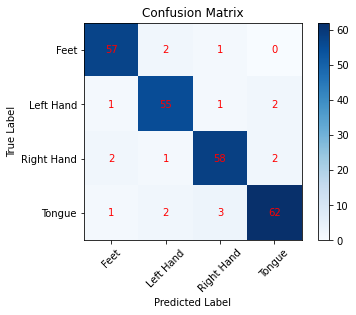

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        60
           1       0.92      0.93      0.92        59
           2       0.92      0.92      0.92        63
           3       0.94      0.91      0.93        68

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250



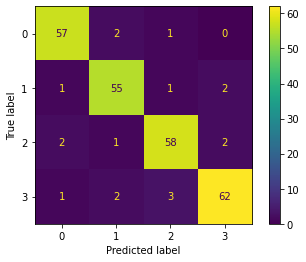

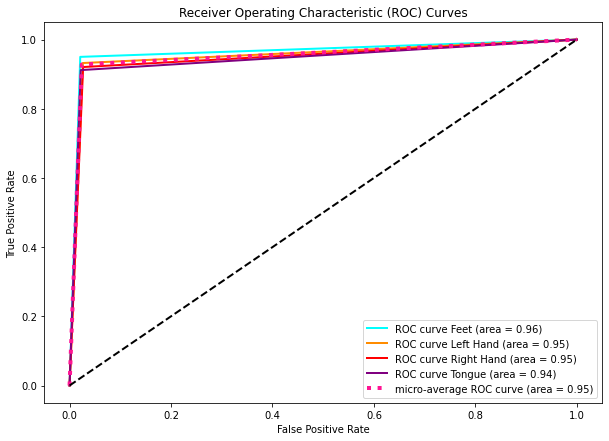

In [33]:
from keras.models import save_model, load_model
import importlib
import EEG_utils
from EEG_utils import print_confusion_matrix, metrics_report, ROC

importlib.reload(EEG_utils)

# Load weights into a new model with the same architecture
# weights_filename = '../Models/resnet-7_weights.h5'
# model = deep_resnet_model
# model.load_weights(weights_filename)

# load entire model
model_path = '../Models/LSTM_testacc_units_dropout_dense_batchsize/LSTM_0.544018030166626_32_0.1_16_16.h5'
model = load_model(model_path)

print(model.summary())

y_test_pred = model.predict(x_test)
y_val_pred = model.predict(x_valid)

y_valid_categorical = np.argmax(y_valid, axis=1)
y_test_categorical = np.argmax(y_test, axis=1)
true_labels = np.argmax(y_test, axis=1)

y_val_pred_categorical = np.argmax(y_val_pred, axis=1)
y_test_pred_categorical = np.argmax(y_test_pred, axis=1)

print("y_test_pred_classes shape:", y_test_pred_categorical.shape)
print("true_labels shape:", true_labels.shape)

print("y_test_pred_classes :", y_test_pred_categorical[0])
print("true_labels :", true_labels[0])
print("y_test :", y_test[0])

## Testing

score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy of the custom model:',score[1])

################################ Plot confusion matrix ###############################
class_names = ['Feet', 'Left Hand', 'Right Hand', 'Tongue']

print_confusion_matrix(y_val_pred_categorical, y_valid_categorical, savefig=True, fig_path='../Gallery/Summary/confusion_matrix_LSTM.png')
metrics_report(y_val_pred_categorical, y_valid_categorical, matrix_on=True, categorical=True, savefig=True, fig_path='../Gallery/Summary/metrics_report_LSTM.png')
ROC(y_val_pred_categorical, y_valid_categorical, class_names=class_names, categorical=True, savefig=True, fig_path='../Gallery/Summary/ROC_LSTM.png')


# ResNet-15

(2115, 22, 1000)
X train val prep (2115, 22, 500)
y train val prep (2115,)
X test prep (443, 22, 500)
y test (443,)
Shape of training set: (1615, 22, 500)
Shape of validation set: (500, 22, 500)
Shape of training labels: (1615,)
Shape of validation labels: (500,)
Shape of training labels after categorical conversion: (1615, 4)
Shape of validation labels after categorical conversion: (500, 4)
Shape of test labels after categorical conversion: (443, 4)
Shape of training set after adding width info: (1615, 22, 500, 1)
Shape of validation set after adding width info: (500, 22, 500, 1)
Shape of test set after adding width info: (443, 22, 500, 1)
X val (500, 500, 1, 22)
y val (500, 4)
Shape of training set after dimension reshaping: (1615, 500, 1, 22)
Shape of validation set after dimension reshaping: (500, 500, 1, 22)
Shape of test set after dimension reshaping: (443, 500, 1, 22)


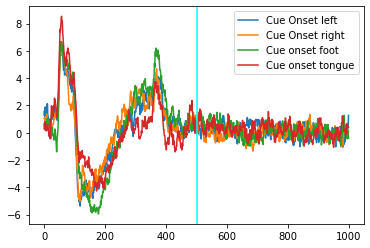

In [34]:
## Loading and visualizing the data

## Loading the dataset

X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")
person_train_valid = np.load("person_train_valid.npy")
X_train_valid = np.load("X_train_valid.npy")
print(X_train_valid.shape)
y_train_valid = np.load("y_train_valid.npy")
person_test = np.load("person_test.npy")

## Adjusting the labels so that 

# Cue onset left - 0
# Cue onset right - 1
# Cue onset foot - 2
# Cue onset tongue - 3

y_train_valid -= 769
y_test -= 769

## Visualizing the data

ch_data = X_train_valid[:,8,:]


class_0_ind = np.where(y_train_valid == 0)
ch_data_class_0 = ch_data[class_0_ind]
avg_ch_data_class_0 = np.mean(ch_data_class_0,axis=0)


class_1_ind = np.where(y_train_valid == 1)
ch_data_class_1 = ch_data[class_1_ind]
avg_ch_data_class_1 = np.mean(ch_data_class_1,axis=0)

class_2_ind = np.where(y_train_valid == 2)
ch_data_class_2 = ch_data[class_2_ind]
avg_ch_data_class_2 = np.mean(ch_data_class_2,axis=0)

class_3_ind = np.where(y_train_valid == 3)
ch_data_class_3 = ch_data[class_3_ind]
avg_ch_data_class_3 = np.mean(ch_data_class_3,axis=0)


plt.plot(np.arange(1000),avg_ch_data_class_0)
plt.plot(np.arange(1000),avg_ch_data_class_1)
plt.plot(np.arange(1000),avg_ch_data_class_2)
plt.plot(np.arange(1000),avg_ch_data_class_3)
plt.axvline(x=500, label='line at t=500',c='cyan')

plt.legend(["Cue Onset left", "Cue Onset right", "Cue onset foot", "Cue onset tongue"])


## Preprocessing the dataset

X_train_valid_prep = X_train_valid[:,:,0:500]
X_test_prep = X_test[:,:,0:500]

print("X train val prep", X_train_valid_prep.shape)
print("y train val prep", y_train_valid.shape)
print("X test prep", X_test_prep.shape)
print("y test", y_test.shape)


## Random splitting and reshaping the data

# First generating the training and validation indices using random splitting
ind_valid = np.random.choice(2115, 500, replace=False)
ind_train = np.array(list(set(range(2115)).difference(set(ind_valid))))

# Creating the training and validation sets using the generated indices
(x_train, x_valid) = X_train_valid_prep[ind_train], X_train_valid_prep[ind_valid] 
(y_train, y_valid) = y_train_valid[ind_train], y_train_valid[ind_valid]
print('Shape of training set:',x_train.shape)
print('Shape of validation set:',x_valid.shape)
print('Shape of training labels:',y_train.shape)
print('Shape of validation labels:',y_valid.shape)

#print("old y_train", y_train[:10])

# Converting the labels to categorical variables for multiclass classification
y_train = to_categorical(y_train, 4)
y_valid = to_categorical(y_valid, 4)
y_test = to_categorical(y_test, 4)

#print("new y_train", y_train[:10])

print('Shape of training labels after categorical conversion:',y_train.shape)
print('Shape of validation labels after categorical conversion:',y_valid.shape)
print('Shape of test labels after categorical conversion:',y_test.shape)

# Adding width of the segment to be 1
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_valid = x_valid.reshape(x_valid.shape[0], x_valid.shape[1], x_train.shape[2], 1)
x_test = X_test_prep.reshape(X_test_prep.shape[0], X_test_prep.shape[1], X_test_prep.shape[2], 1)
print('Shape of training set after adding width info:',x_train.shape)
print('Shape of validation set after adding width info:',x_valid.shape)
print('Shape of test set after adding width info:',x_test.shape)


# Reshaping the training and validation dataset
x_train = np.swapaxes(x_train, 1,3)
x_train = np.swapaxes(x_train, 1,2)
x_valid = np.swapaxes(x_valid, 1,3)
x_valid = np.swapaxes(x_valid, 1,2)
x_test = np.swapaxes(x_test, 1,3)
x_test = np.swapaxes(x_test, 1,2)

print("X val", x_valid.shape)
print("y val", y_valid.shape)

print('Shape of training set after dimension reshaping:',x_train.shape)
print('Shape of validation set after dimension reshaping:',x_valid.shape)
print('Shape of test set after dimension reshaping:',x_test.shape)

In [38]:
from keras.models import save_model, load_model
import importlib
import EEG_utils
from EEG_utils import print_confusion_matrix, metrics_report, ROC

importlib.reload(EEG_utils)

# Load weights into a new model with the same architecture
# weights_filename = '../Models/resnet-7_weights.h5'
# model = deep_resnet_model
# model.load_weights(weights_filename)

# load entire model
name = 'resnet-15'
model_path = f'../Models/{name}.h5'
model = load_model(model_path)

print(model.summary())

y_test_pred = model.predict(x_test)
y_val_pred = model.predict(x_valid)

y_valid_categorical = np.argmax(y_valid, axis=1)
y_test_categorical = np.argmax(y_test, axis=1)
true_labels = np.argmax(y_test, axis=1)

y_val_pred_categorical = np.argmax(y_val_pred, axis=1)
y_test_pred_categorical = np.argmax(y_test_pred, axis=1)

# print("y_test_pred_classes shape:", y_test_pred_categorical.shape)
# print("true_labels shape:", true_labels.shape)

# print("y_test_pred_classes :", y_test_pred_categorical[0])
# print("true_labels :", true_labels[0])
# print("y_test :", y_test[0])

## Testing

# score = model.evaluate(x_test, y_test, verbose=0)
# print('Test accuracy of the custom model:',score[1])

################################ Plot confusion matrix ###############################
class_names = ['Feet', 'Left Hand', 'Right Hand', 'Tongue']

print_confusion_matrix(y_val_pred_categorical, y_valid_categorical, savefig=True, fig_path=f'../Gallery/Summary/confusion_matrix_{name}.png')
metrics_report(y_val_pred_categorical, y_valid_categorical, matrix_on=True, categorical=True, savefig=True, fig_path=f'../Gallery/Summary/metrics_report_{name}.png')
ROC(y_val_pred_categorical, y_valid_categorical, class_names=class_names, categorical=True, savefig=True, fig_path=f'../Gallery/Summary/ROC_{name}.png')


Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 22, 128)           322048    
                                                                 
 dropout_9 (Dropout)         (None, 22, 128)           0         
                                                                 
 lstm_27 (LSTM)              (None, 22, 64)            49408     
                                                                 
 dropout_10 (Dropout)        (None, 22, 64)            0         
                                                                 
 lstm_28 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_11 (Dropout)        (None, 32)                0         
                                                                 
 dense_20 (Dense)            (None, 4)               

ValueError: in user code:

    File "/opt/miniconda3/lib/python3.9/site-packages/keras/engine/training.py", line 2137, in predict_function  *
        return step_function(self, iterator)
    File "/opt/miniconda3/lib/python3.9/site-packages/keras/engine/training.py", line 2123, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/miniconda3/lib/python3.9/site-packages/keras/engine/training.py", line 2111, in run_step  **
        outputs = model.predict_step(data)
    File "/opt/miniconda3/lib/python3.9/site-packages/keras/engine/training.py", line 2079, in predict_step
        return self(x, training=False)
    File "/opt/miniconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/opt/miniconda3/lib/python3.9/site-packages/keras/engine/input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_20" is incompatible with the layer: expected shape=(None, 22, 500), found shape=(None, 500, 1, 22)
